In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import re
import torch
import torch.nn as nn

path = [
    "LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct",
    "E:/pretrained_models/Qwen/Qwen2___5-0___5B-Instruct",
]

tokenizer = AutoTokenizer.from_pretrained(
    path[0], trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    path[0], device_map="auto", torch_dtype="auto", trust_remote_code=True).eval()
# Prepare Hook

In [3]:
def count_zh(text: str) -> int:
    zh_pattern = re.findall(r'[\u4e00-\u9fff，。？！：；“”‘’（）《》【】]', text)
    return len(zh_pattern)

count_zh("你好，月色真美，dgmesyz:：。")

10

In [6]:
NUM_LAYERS = model.config.num_hidden_layers

zh_table, al_table, zh_num = [0] * NUM_LAYERS, [0] * NUM_LAYERS, [0]
hooks = []


@torch.inference_mode()
def hook(modules: nn.Module, inp, out):
    with torch.no_grad():
        hidden_states = out[0].detach().clone()
        if hidden_states.device != model.device:
            hidden_states = hidden_states.to(model.device)

        hidden_states = model.model.layer(hidden_states)
        logits = model.lm_head(hidden_states)
        input_ids = logits.argmax(dim=-1, keepdim=True)
        
    
        zh, al, s = 0, 0, ""
        for id in input_ids[0]:
            generate_str = tokenizer.decode(
                id, skip_special_tokens=True)   
            zh += count_zh(generate_str)
            al += 1
            s += generate_str
        print(
            repr(f"layer: {prefix}, generate: {s}, count_zh: {zh}, length: {al}"))
        layer_num = int(prefix.split(".")[-1])
        zh_table[layer_num] += zh
        al_table[layer_num] += al
    return out

pattern = re.compile(r".*layer\.\d*$")

for name, module in model.named_modules():
    if re.match(pattern, name):
        print(name)
        hooks.append(
            module.register_forward_hook(
                hook=lambda modules, inp, out, prefix=name: hook(modules, inp, out, prefix=prefix)
        ))
        
        
# from datasets import load_dataset
# ds = load_dataset("E:/datasets/mgsm", "zh", trust_remote_code=True)

text = [
    "珍妮特的鸭子每天下 16 颗蛋。她每天早上早餐时吃 3 颗，每天用 4 颗为自己的朋友做松饼。剩下的鸭蛋她每天拿去农贸市场卖，每颗新鲜鸭蛋卖 2 美元。她每天在农贸市场赚多少钱？",
    "温迪每天给她的每只鸡喂 3 杯含有种子、黄粉虫和蔬菜的混合鸡饲料，以帮助它们保持健康。她给鸡喂 3 顿饲料。上午，她给鸡群喂 15 杯饲料。下午，她给鸡喂 25 杯饲料。如果温迪的鸡群规模达到 20 只，则在一天中的最后一顿，她需要给鸡喂多少杯饲料？"
]

tokenizer.pad_token = tokenizer.eos_token
for t in text:
    print(t)
    x = model(**tokenizer(t, return_tensors="pt", add_special_tokens=False).to(model.device)).logits
    x = x.argmax(dim=-1).squeeze(0)
    # print(tokenizer.decode(x, skip_special_tokens=True))
# print(string)
for hook_ in hooks:
    hook_.remove()
print([f"Layer {i}: {zh_table[i]}/{al_table[i]}" for i in range(len(zh_table))])
# print(
#     f"generate zh_word {count_zh(string)} and greedy zh_word {zh_num[0]}"
# )

transformer.h.0
transformer.h.1
transformer.h.2
transformer.h.3
transformer.h.4
transformer.h.5
transformer.h.6
transformer.h.7
transformer.h.8
transformer.h.9
transformer.h.10
transformer.h.11
transformer.h.12
transformer.h.13
transformer.h.14
transformer.h.15
transformer.h.16
transformer.h.17
transformer.h.18
transformer.h.19
transformer.h.20
transformer.h.21
transformer.h.22
transformer.h.23
transformer.h.24
transformer.h.25
transformer.h.26
transformer.h.27
transformer.h.28
transformer.h.29
珍妮特的鸭子每天下 16 颗蛋。她每天早上早餐时吃 3 颗，每天用 4 颗为自己的朋友做松饼。剩下的鸭蛋她每天拿去农贸市场卖，每颗新鲜鸭蛋卖 2 美元。她每天在农贸市场赚多少钱？
'layer: transformer.h.0, generate: ����特的���子��天下 16 �����。����天��上�������� 3 �� historically��天用 4 ��为自己的��友�������。��下的����������天��去����市����,����新����������� 2 美元。����天在����市����多少���?, count_zh: 30, length: 137'
'layer: transformer.h.0, generate: ����特的���子��天下 16 �����。����天��上�������� 3 �� historically��天用 4 ��为自己的��友�������。��下的����������天��去����市����,����新����������� 2 美元。����天在����市����多少���?, cou

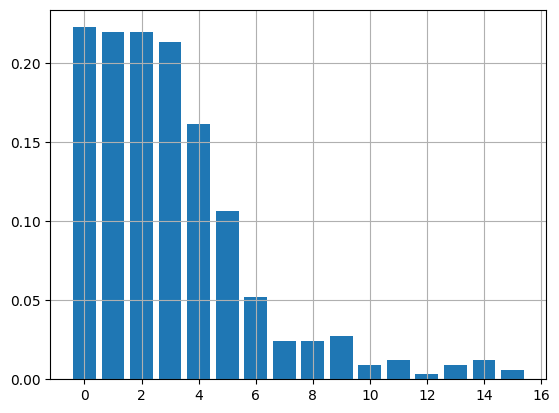

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.bar(np.arange(16), [zh_table[i]/al_table[i] for i in range(16)], label="zh_word/length")
ax.grid()

In [5]:
(1,) + (2,) + (3,) + (4,)

(1, 2, 3, 4)

: 